<a href="https://colab.research.google.com/github/ZahibVentura/Simulaci-n-1/blob/main/Monte_Carlo_tarea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Queremos calcular:
$$I=\int _{0}^{1}\sqrt{arctan(x)} dx$$

Con: $$\theta_1=(b-a)\frac{1}{n} \sum_{i=1}^{n}g(X_i) \quad con \quad X_i\sim U(0,1) $$

$$y \quad g(x)=\sqrt{arctan(x)}$$

Donde $\theta_1$ es nuestro estimador.

###Monte Carlo Media Muestral

1.Generar una secuencia ${U_{i}}^{n}$ con distribución uniforme $U(0,1)$

2.Calcular $X_{i} = a + U_{i}(b-a)$

3.Calcular $g(X_{i})$, para $i = 1,...,n$

4.Estimar $I$ calculando la media muestral $θ_{1}$

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
#import scipy.integrate as spi

In [81]:
#Definimos g(x)
def g(x):
  return (np.arctan(x))**(1/2)

In [28]:
#Función que nos devuelve la lista de los valores de la probabilidades simulados
def estimacion(n,a=0,b=1):
  eje_g=[]
  lista=[]
  for i in range(n):
    U=np.random.uniform() #generamos un numero random
    X=a + U*(b-a)  #Calculamos el paso 2
    valor=g(X)
    eje_g.append(valor) #guardamos el valor de g(x)
    suma=sum(eje_g)
    theta_1=(b-a)/(i+1)*suma #guardamos las probabilidades
    lista.append(theta_1)


  return lista

In [51]:
#Definimos los limites de la integral así como el número N
A=0
B=1
N=500

In [59]:
G = estimacion(N,A,B)

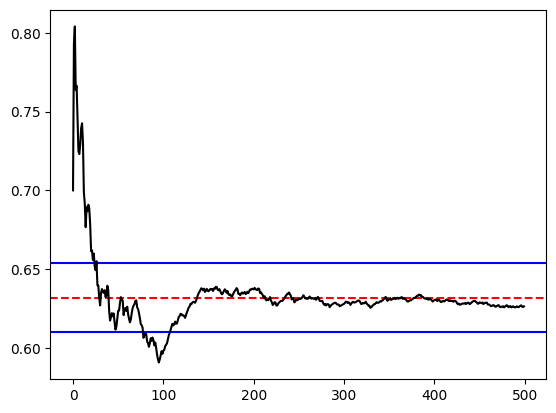

In [60]:
media=np.mean(G) #calculamos la media de las medias de la muestra
desv=np.std(G)   #Calculamos el error estandar de la media


plt.axhline(media,color='r',linestyle='--') #media
plt.axhline((desv+media),color='b') #limite superior del intervalo
plt.axhline((-desv+media),color='b') #limite inferior del intervalo
plt.plot(G,color = 'k')
plt.show()

Estimamos un intervalo de confianza del 95% y dado que $n\geq 30$:
$$\bar{x}-z_{\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}\leq x\leq \bar{x}+z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}}$$

In [61]:
# Calculando el valor crítico de la distribución
p=0.95
error_estandar = desv / (N**0.5)
valor_critico = stats.norm.ppf((1 + p) / 2)

intervalo_inferior = media - valor_critico * error_estandar
intervalo_superior = media + valor_critico * error_estandar
#Intervalo de confianza
print(f"Intervalo de confianza del {p*100}%: ({intervalo_inferior}, {intervalo_superior})")

Intervalo de confianza del 95.0%: (0.6301630433463266, 0.6339964032614442)


In [62]:
print(f"La media muestral es: {media}")

La media muestral es: 0.6320797233038854


In [63]:
def simulacion(M):
  r=[]
  for i in range(M):
    R=estimacion(N,A,B)
    r.append(R[-1])
  return r

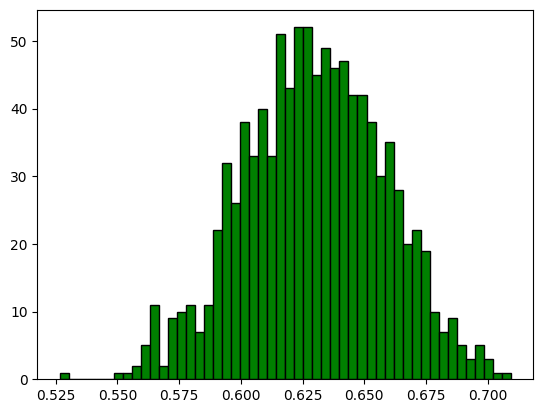

In [64]:
N=50 #tamaño de la muestra
S1=simulacion(1000)
plt.hist(S1, bins=50,edgecolor="black",color="g")
plt.show()

In [65]:
MC_MediaM=np.mean(S1)
print(MC_MediaM)

0.6295564431161212



Queremos calcular:
$$I=\int _{0}^{1}\sqrt{arctan(x)} dx$$
$$y \quad g(x)=\sqrt{arctan(x)}$$

Con:$$c=g(1)$$

Ademas: $$p=\frac{n}{N}$$
$$n: \text{numero de aciertos}$$
$$N: \text{Numero de experimentos}$$
Donde $p$ estima la integral.

###Metodo Monte Carlo aciero y error
1. Generar una secuencia $U_{i}^{2n}$ con distribución uniforme
2. Conformar pares $(U_{i},U_{n+i})$ para $i=1,...,n$
3. Calcular $X_{i} = a+U_{i}(b-a)$ para $i=1,...,n$
4. Calcular $g(X_{i})$ para $i=1,...,n$
5. Contar los aciertos $n_{a}$ tales que $g(X_{i})>cU_{n+i}$
6. Estimar $I$

In [97]:
def estimacion2(N,a=0,b=1):
  Lista=[]

  c=g(b)  #dado que la funcion esta acotada, esta alcanza su maximo en el limite superior
  n=0
  for i in range(N):
    U1=np.random.uniform()
    U2=np.random.uniform()
    X=a + U1*(b-a)
    gx=g(X)


    if gx>c*U2: #condicion de exitos
      n+=1     #numero de exitos
      theta_2=(c*(b-a))*(n/((i+1))) #Guardamos probabilidades
      Lista.append(theta_2)
  return Lista

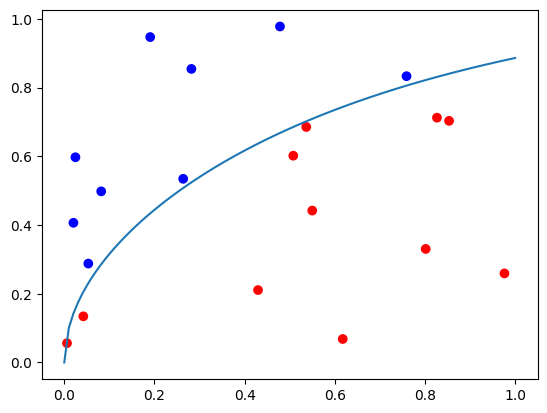

In [98]:
# Puntos aleatorios
U1 = np.random.uniform(size=20)
U2 = np.random.uniform(size=20)

# Evaluamos la función en U1
y_values = g(U1)

# Compara U2 con los valores de la función
colors = ["red" if u2 < y else "blue" for u2, y in zip(U2, y_values)]

# Grafica la función
x = np.linspace(0, 1, 100)
plt.plot(x, g(x))

# Gráfico de dispersión con colores diferentes
plt.scatter(U1, U2, color=colors)

In [99]:
T =500

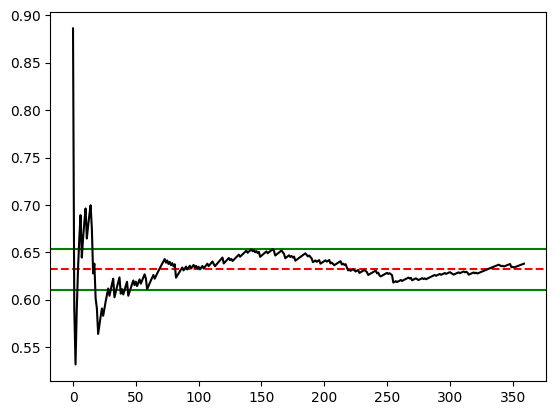

In [104]:
H = estimacion2(T,A,B)

Media=np.mean(G) #calculamos la media de las medias de la muestra
Desv=np.std(G)   #Calculamos el error estandar de la media
#Graficamos un intervalo de confianza de un error estandar
plt.axhline(Media,color='r',linestyle='--') #media
plt.axhline((Desv+Media),color='g') #limite superior del intervalo
plt.axhline((-Desv+Media),color='g') #limite inferior del intervalo
plt.plot(H,color='k') #muestra
plt.show()

In [105]:
# Calculando el valor crítico
p=0.95
error_estandar = desv / (N**0.5)
valor_critico = stats.norm.ppf((1 + p) / 2)

intervalo_inferior = media - valor_critico * error_estandar
intervalo_superior = media + valor_critico * error_estandar
#Intervalo de confianza
print(f"Intervalo de confianza del {p*100}%: ({intervalo_inferior}, {intervalo_superior})")

Intervalo de confianza del 95.0%: (0.6260186490924048, 0.638140797515366)


In [110]:
N=50

In [116]:
def simulacion2(M):
  R1=[]
  for i in range(M):
    R=estimacion2(N,A,B)
    R1.append(R[-1])
  return R1

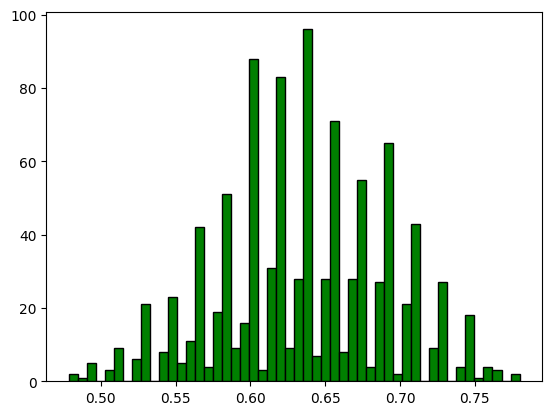

In [118]:

S2=simulacion2(1000)
plt.hist(S2, bins=50,edgecolor="black",color='g')
plt.show()

In [120]:
MC_AciertoE=np.mean(S2)
print(MC_AciertoE)

0.6355837248690778
